In [3]:
# Install necessary packages
!pip install pandas numpy seaborn plotly

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Set display options
pd.set_option('display.max_columns', None)

In [4]:
# Load the red wine dataset
red_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df_red = pd.read_csv(red_wine_url, sep=';')

# Load the white wine dataset
white_wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
df_white = pd.read_csv(white_wine_url, sep=';')

# Add a 'type' column to distinguish between red and white wine
df_red['type'] = 'red'
df_white['type'] = 'white'

# Combine datasets
df = pd.concat([df_red, df_white], ignore_index=True)

# Display the first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
# Get the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display column names
print("Columns in the dataset:")
print(df.columns.tolist())

Dataset contains 6497 rows and 13 columns.
Columns in the dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


In [6]:
# Check for missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
# Check data types
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [8]:
df.columns = [col.replace(' ', '_') for col in df.columns]
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [9]:
# Descriptive statistics
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<ipython-input-10-24f0d705c45b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


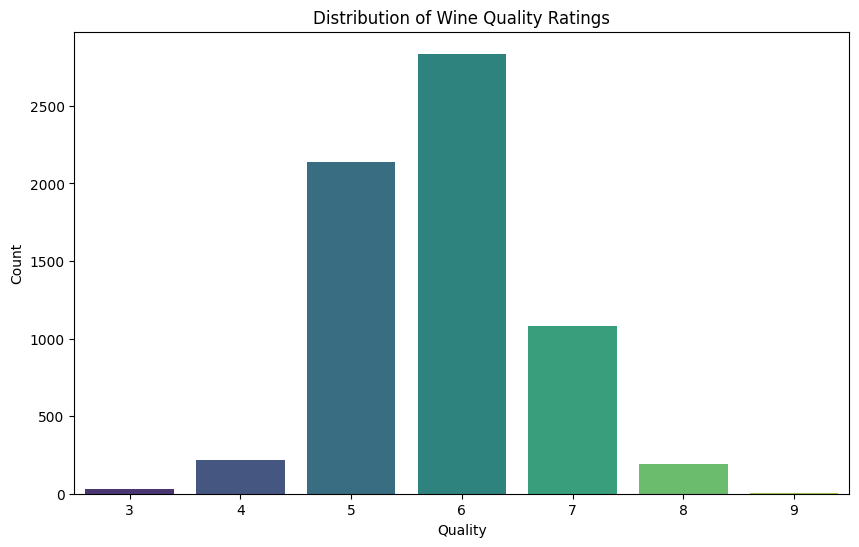

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

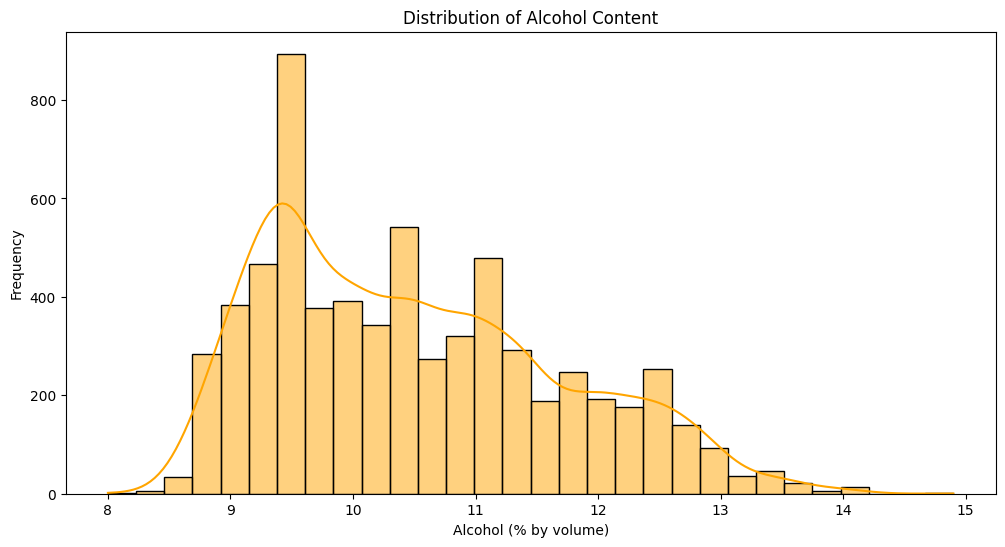

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df['alcohol'], bins=30, kde=True, color='orange')
plt.title('Distribution of Alcohol Content')
plt.xlabel('Alcohol (% by volume)')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Compute correlation with quality
numeric_df = df.select_dtypes(include=[np.number])  # Exclude non-numeric columns
correlation = numeric_df.corr()['quality'].drop('quality')
correlation.sort_values(ascending=False)

,quality
alcohol,0.444319
citric_acid,0.085532
free_sulfur_dioxide,0.055463
sulphates,0.038485
pH,0.019506
residual_sugar,-0.036980
total_sulfur_dioxide,-0.041385
fixed_acidity,-0.076743
chlorides,-0.200666
volatile_acidity,-0.265699


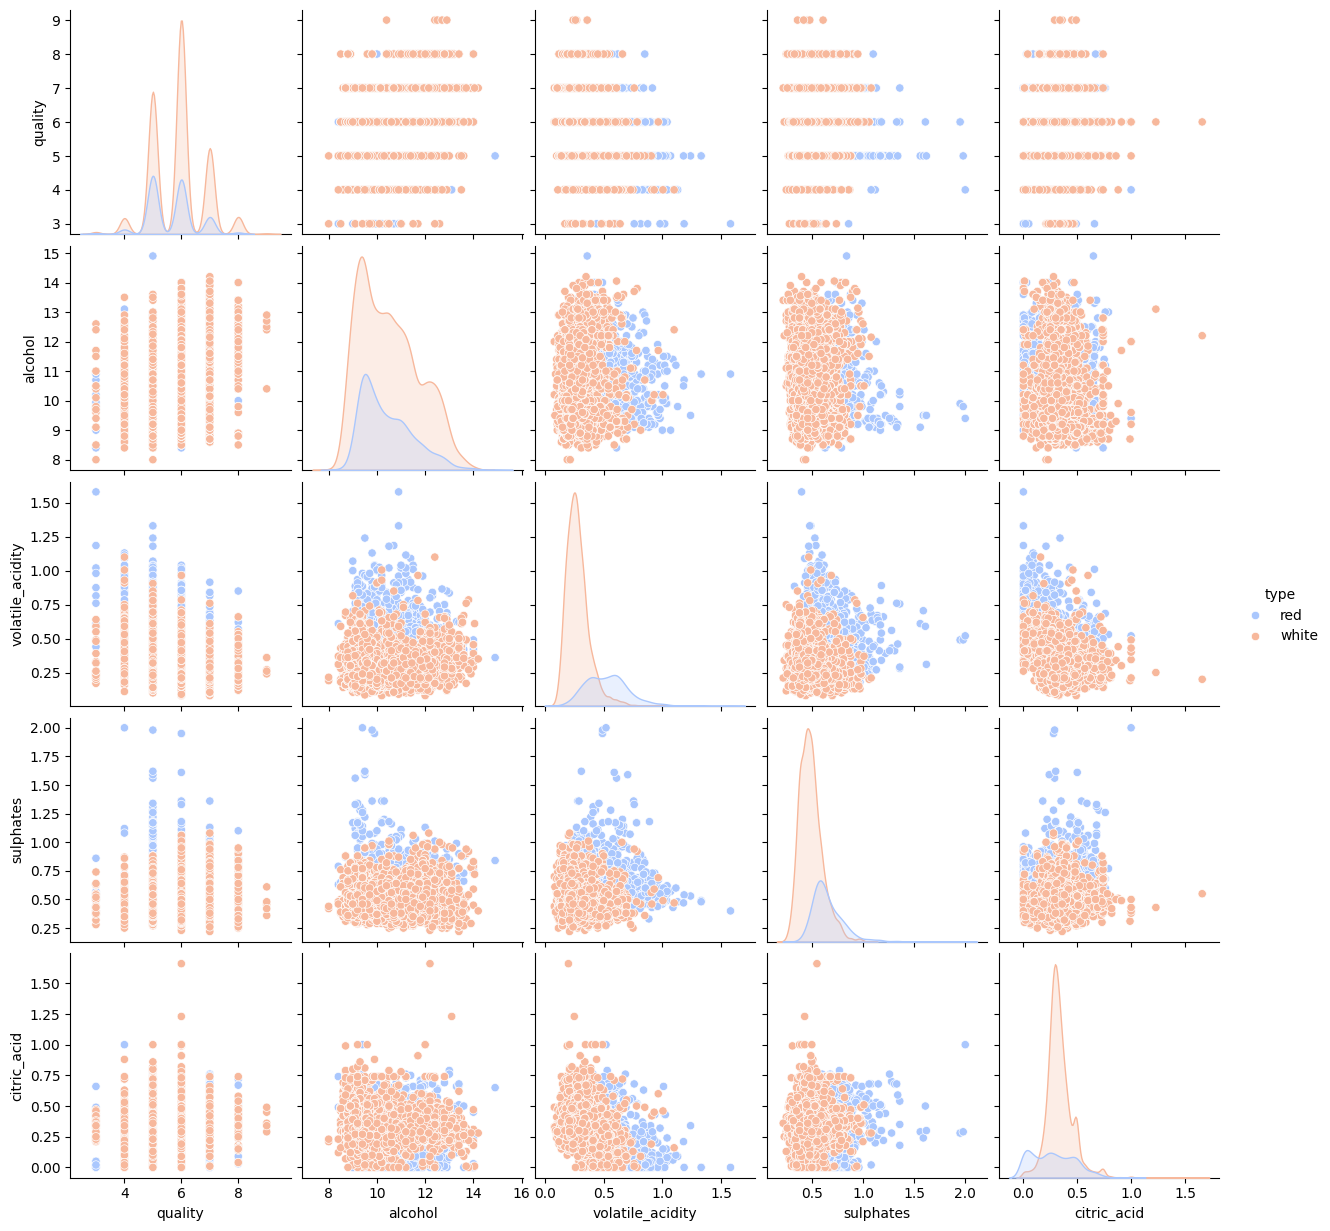

In [13]:
sns.pairplot(df, vars=['quality', 'alcohol', 'volatile_acidity', 'sulphates', 'citric_acid'], hue='type', palette='coolwarm')
plt.show()

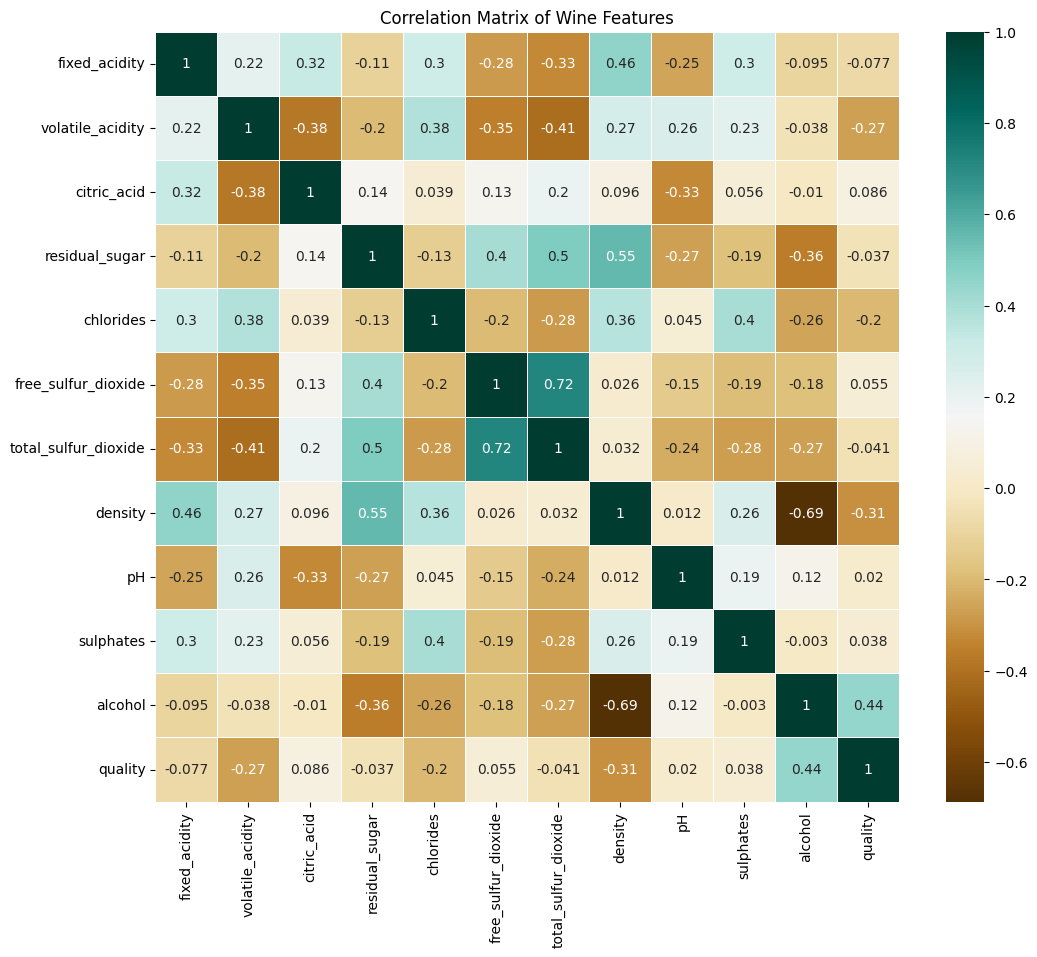

In [14]:
# Exclude non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='BrBG', linewidths=0.5)
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [15]:
# Prepare data for D3.js
quality_counts = df['quality'].value_counts().reset_index()
quality_counts.columns = ['quality', 'count']
quality_counts = quality_counts.sort_values('quality')
quality_counts_json = quality_counts.to_json(orient='records')

In [16]:
from IPython.display import display, HTML

# Create HTML and JavaScript code for D3.js histogram
html_histogram = '''
<!DOCTYPE html>
<meta charset="utf-8">
<style>
.bar {{
  fill: steelblue;
}}
.bar:hover {{
  fill: brown;
}}
.axis {{
  font: 12px sans-serif;
}}
.axis path,
.axis line {{
  fill: none;
  stroke: #000;
  shape-rendering: crispEdges;
}}
</style>
<body>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

// Data
var data = {data};

// Set dimensions
var margin = {{top: 20, right: 30, bottom: 30, left: 40}},
    width = 600 - margin.left - margin.right,
    height = 400 - margin.top - margin.bottom;

// Set scales
var x = d3.scaleBand()
    .range([0, width])
    .padding(0.1);

var y = d3.scaleLinear()
    .range([height, 0]);

// Append SVG object
var svg = d3.select("body").append("svg")
    .attr("width", width + margin.left + margin.right + 100)
    .attr("height", height + margin.top + margin.bottom + 100)
  .append("g")
    .attr("transform",
          "translate(" + margin.left + "," + margin.top + ")");

// Parse data
data.forEach(function(d) {{
  d.quality = +d.quality;
  d.count = +d.count;
}});

// Set domains
x.domain(data.map(function(d) {{ return d.quality; }}));
y.domain([0, d3.max(data, function(d) {{ return d.count; }})]);

// Add bars
svg.selectAll(".bar")
    .data(data)
  .enter().append("rect")
    .attr("class", "bar")
    .attr("x", function(d) {{ return x(d.quality); }})
    .attr("width", x.bandwidth())
    .attr("y", function(d) {{ return y(d.count); }})
    .attr("height", function(d) {{ return height - y(d.count); }})
    .on("mouseover", function(d, i) {{
      d3.select(this).attr("fill", "brown");
    }})
    .on("mouseout", function(d, i) {{
      d3.select(this).attr("fill", "steelblue");
    }});

// Add x-axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

// Add y-axis
svg.append("g")
    .call(d3.axisLeft(y));

// Add labels
svg.append("text")
    .attr("x", width / 2 )
    .attr("y",  height + margin.bottom )
    .style("text-anchor", "middle")
    .text("Quality");

svg.append("text")
    .attr("transform", "rotate(-90)")
    .attr("x", -height / 2 )
    .attr("y", -margin.left + 15 )
    .style("text-anchor", "middle")
    .text("Count");

svg.append("text")
    .attr("x", width / 2 )
    .attr("y", -10 )
    .style("text-anchor", "middle")
    .style("font-size", "16px")
    .text("Distribution of Wine Quality Ratings");

</script>
'''

# Insert data into the HTML template
html_histogram = html_histogram.format(data=quality_counts_json)

# Display the histogram
display(HTML(html_histogram))

In [17]:
# Prepare data for D3.js scatter plot
scatter_data = df[['alcohol', 'quality', 'type']]
scatter_data_json = scatter_data.to_json(orient='records')

In [18]:
# Create HTML and JavaScript code for D3.js scatter plot
html_scatter = '''
<!DOCTYPE html>
<meta charset="utf-8">
<style>
.axis {{
  font: 12px sans-serif;
}}
.axis path,
.axis line {{
  fill: none;
  stroke: #000;
  shape-rendering: crispEdges;
}}
.dot {{
  stroke: #000;
}}
.tooltip {{
  position: absolute;
  text-align: center;
  padding: 6px;
  font: 12px sans-serif;
  background: lightsteelblue;
  border: 0px;
  border-radius: 8px;
  pointer-events: none;
}}
</style>
<body>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

// Data
var data = {data};

// Set dimensions
var margin = {{top: 20, right: 20, bottom: 30, left: 40}},
    width = 600 - margin.left - margin.right,
    height = 400 - margin.top - margin.bottom;

// Set scales
var x = d3.scaleLinear()
    .range([0, width]);

var y = d3.scaleLinear()
    .range([height, 0]);

// Color scale
var color = d3.scaleOrdinal()
    .domain(["red", "white"])
    .range(["#e41a1c", "#377eb8"]);

// Append SVG object
var svg = d3.select("body").append("svg")
    .attr("width", width + margin.left + margin.right + 100)
    .attr("height", height + margin.top + margin.bottom + 100)
  .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

// Tooltip
var tooltip = d3.select("body").append("div")
    .attr("class", "tooltip")
    .style("opacity", 0);

// Parse data
data.forEach(function(d) {{
  d.alcohol = +d.alcohol;
  d.quality = +d.quality;
}});

// Set domains
x.domain(d3.extent(data, function(d) {{ return d.alcohol; }})).nice();
y.domain(d3.extent(data, function(d) {{ return d.quality; }})).nice();

// Add dots
svg.selectAll(".dot")
    .data(data)
  .enter().append("circle")
    .attr("class", "dot")
    .attr("r", 3.5)
    .attr("cx", function(d) {{ return x(d.alcohol); }})
    .attr("cy", function(d) {{ return y(d.quality); }})
    .style("fill", function(d) {{ return color(d.type); }})
    .on("mouseover", function(d) {{
        tooltip.transition()
            .duration(200)
            .style("opacity", .9);
        tooltip.html("Type: " + d.type + "<br/>Alcohol: " + d.alcohol + "<br/>Quality: " + d.quality)
            .style("left", (d3.event.pageX + 5) + "px")
            .style("top", (d3.event.pageY - 28) + "px");
    }})
    .on("mouseout", function(d) {{
        tooltip.transition()
            .duration(500)
            .style("opacity", 0);
    }});

// Add x-axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

// Add y-axis
svg.append("g")
    .call(d3.axisLeft(y));

// Add labels
svg.append("text")
    .attr("x", width / 2 )
    .attr("y",  height + margin.bottom )
    .style("text-anchor", "middle")
    .text("Alcohol (% by volume)");

svg.append("text")
    .attr("transform", "rotate(-90)")
    .attr("x", -height / 2 )
    .attr("y", -margin.left + 15 )
    .style("text-anchor", "middle")
    .text("Quality");

svg.append("text")
    .attr("x", width / 2 )
    .attr("y", -10 )
    .style("text-anchor", "middle")
    .style("font-size", "16px")
    .text("Alcohol Content vs Quality Scatter Plot");

// Legend
var legend = svg.selectAll(".legend")
    .data(color.domain())
  .enter().append("g")
    .attr("class", "legend")
    .attr("transform", function(d, i) {{ return "translate(0," + i * 20 + ")"; }});

legend.append("rect")
    .attr("x", width + 20)
    .attr("width", 18)
    .attr("height", 18)
    .style("fill", color);

legend.append("text")
    .attr("x", width + 44)
    .attr("y", 9)
    .attr("dy", ".35em")
    .text(function(d) {{ return d; }});

</script>
'''

# Insert data into the HTML template
html_scatter = html_scatter.format(data=scatter_data_json)

# Display the scatter plot
display(HTML(html_scatter))

In [19]:
# Compute correlation matrix
numeric_df = df.select_dtypes(include=[np.number])  # Exclude non-numeric columns
corr_matrix = numeric_df.corr().round(2)

# Prepare data for D3.js
import json

corr_data = []
cols = corr_matrix.columns.tolist()
for i in range(len(cols)):
    for j in range(len(cols)):
        corr_data.append({
            'x': cols[i],
            'y': cols[j],
            'value': corr_matrix.iloc[i, j]
        })

corr_data_json = json.dumps(corr_data)
cols_json = json.dumps(cols)

In [20]:
# Create HTML and JavaScript code for D3.js heatmap
html_heatmap = '''
<!DOCTYPE html>
<meta charset="utf-8">
<style>
.cell {{
  stroke: #fff;
}}
.axis text {{
  font-size: 12px;
}}
.tooltip {{
  position: absolute;
  text-align: center;
  padding: 6px;
  font: 12px sans-serif;
  background: lightsteelblue;
  border: 0px;
  border-radius: 8px;
  pointer-events: none;
}}
</style>
<body>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

// Data
var data = {data};
var features = {features};

// Set dimensions
var margin = {{top: 100, right: 0, bottom: 0, left: 100}},
    width = 600,
    height = 600;

// Set scales
var x = d3.scaleBand()
    .range([0, width])
    .domain(features)
    .padding(0.05);

var y = d3.scaleBand()
    .range([0, height])
    .domain(features)
    .padding(0.05);

// Color scale
var colorScale = d3.scaleSequential(d3.interpolateRdBu)
    .domain([-1,1]);

// Append SVG object
var svg = d3.select("body").append("svg")
    .attr("width", width + margin.left + margin.right + 100)
    .attr("height", height + margin.top + margin.bottom + 100)
  .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

// Tooltip
var tooltip = d3.select("body").append("div")
    .attr("class", "tooltip")
    .style("opacity", 0);

// Add cells
svg.selectAll()
    .data(data, function(d) {{ return d.x+':'+d.y; }})
  .enter().append("rect")
    .attr("x", function(d) {{ return x(d.x); }})
    .attr("y", function(d) {{ return y(d.y); }})
    .attr("width", x.bandwidth() )
    .attr("height", y.bandwidth() )
    .style("fill", function(d) {{ return colorScale(d.value); }})
    .style("stroke-width", 1)
    .style("stroke", "white")
    .on("mouseover", function(d) {{
        tooltip.transition()
            .duration(200)
            .style("opacity", .9);
        tooltip.html(d.x + " vs " + d.y + "<br/>Correlation: " + d.value)
            .style("left", (d3.event.pageX + 5) + "px")
            .style("top", (d3.event.pageY - 28) + "px");
    }})
    .on("mouseout", function(d) {{
        tooltip.transition()
            .duration(500)
            .style("opacity", 0);
    }});

// Add x-axis
svg.append("g")
    .style("font-size", 12)
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x).tickSize(0))
    .select(".domain").remove();

// Add y-axis
svg.append("g")
    .style("font-size", 12)
    .call(d3.axisLeft(y).tickSize(0))
    .select(".domain").remove();

// Add title
svg.append("text")
    .attr("x", width / 2 )
    .attr("y", -50 )
    .style("text-anchor", "middle")
    .style("font-size", "16px")
    .text("Correlation Matrix Heatmap");

</script>
'''

# Insert data into the HTML template
html_heatmap = html_heatmap.format(data=corr_data_json, features=cols_json)

# Display the heatmap
display(HTML(html_heatmap))

In [21]:
# Define quality labels
def quality_label(quality):
    if quality <= 5:
        return 'Low'
    elif quality <= 7:
        return 'Medium'
    else:
        return 'High'

df['quality_label'] = df['quality'].apply(quality_label)
df['quality_label'].value_counts()

,count
quality_label,
Medium,3915
Low,2384
High,198


In [22]:
# Select features
features = df.drop(['quality', 'quality_label', 'type'], axis=1)

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

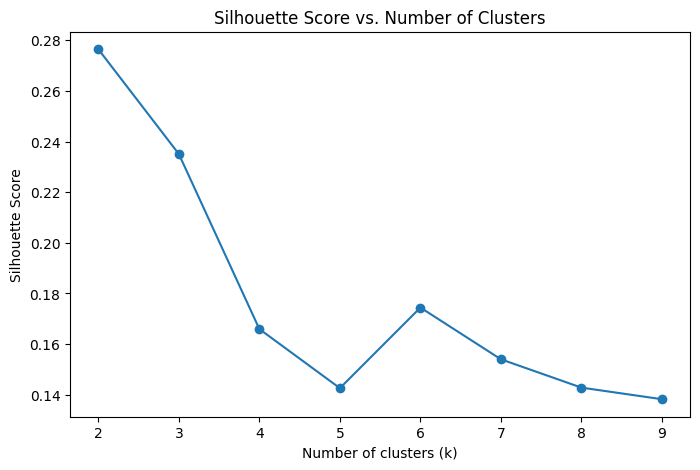

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [24]:
# Choose k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [25]:
# Apply PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create DataFrame for visualization
cluster_data = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
cluster_data['cluster'] = df['cluster'].astype(str)
cluster_data['quality_label'] = df['quality_label']
cluster_data['type'] = df['type']
cluster_data_json = cluster_data.to_json(orient='records')

In [26]:
# Create HTML and JavaScript code for D3.js cluster scatter plot
html_cluster = '''
<!DOCTYPE html>
<meta charset="utf-8">
<style>
.axis {{
  font: 12px sans-serif;
}}
.axis path,
.axis line {{
  fill: none;
  stroke: #000;
  shape-rendering: crispEdges;
}}
.dot {{
  stroke: #000;
}}
.legend {{
  font-size: 12px;
}}
.tooltip {{
  position: absolute;
  text-align: center;
  padding: 6px;
  font: 12px sans-serif;
  background: lightsteelblue;
  border: 0px;
  border-radius: 8px;
  pointer-events: none;
}}
</style>
<body>
<script src="https://d3js.org/d3.v5.min.js"></script>
<script>

// Data
var data = {data};

// Set dimensions
var margin = {{top: 20, right: 20, bottom: 30, left: 40}},
    width = 600 - margin.left - margin.right,
    height = 400 - margin.top - margin.bottom;

// Set scales
var x = d3.scaleLinear()
    .range([0, width]);

var y = d3.scaleLinear()
    .range([height, 0]);

// Color scale for clusters
var color = d3.scaleOrdinal(d3.schemeCategory10);

// Shape scale for quality labels
var shape = d3.scaleOrdinal()
    .domain(["Low", "Medium", "High"])
    .range([d3.symbolTriangle, d3.symbolCircle, d3.symbolDiamond]);

// Append SVG object
var svg = d3.select("body").append("svg")
    .attr("width", width + margin.left + margin.right + 200)
    .attr("height", height + margin.top + margin.bottom + 100)
  .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

// Tooltip
var tooltip = d3.select("body").append("div")
    .attr("class", "tooltip")
    .style("opacity", 0);

// Parse data
data.forEach(function(d) {{
  d.PC1 = +d.PC1;
  d.PC2 = +d.PC2;
}});

// Set domains
x.domain(d3.extent(data, function(d) {{ return d.PC1; }})).nice();
y.domain(d3.extent(data, function(d) {{ return d.PC2; }})).nice();

// Add symbols
svg.selectAll(".dot")
    .data(data)
  .enter().append("path")
    .attr("class", "dot")
    .attr("transform", function(d) {{ return "translate(" + x(d.PC1) + "," + y(d.PC2) + ")"; }})
    .attr("d", d3.symbol().type(function(d) {{ return shape(d.quality_label); }}).size(64))
    .style("fill", function(d) {{ return color(d.cluster); }})
    .on("mouseover", function(d) {{
        tooltip.transition()
            .duration(200)
            .style("opacity", .9);
        tooltip.html("Cluster: " + d.cluster + "<br/>Quality: " + d.quality_label + "<br/>Type: " + d.type)
            .style("left", (d3.event.pageX + 5) + "px")
            .style("top", (d3.event.pageY - 28) + "px");
    }})
    .on("mouseout", function(d) {{
        tooltip.transition()
            .duration(500)
            .style("opacity", 0);
    }});

// Add x-axis
svg.append("g")
    .attr("transform", "translate(0," + height + ")")
    .call(d3.axisBottom(x));

// Add y-axis
svg.append("g")
    .call(d3.axisLeft(y));

// Add labels
svg.append("text")
    .attr("x", width / 2 )
    .attr("y",  height + margin.bottom )
    .style("text-anchor", "middle")
    .text("Principal Component 1");

svg.append("text")
    .attr("transform", "rotate(-90)")
    .attr("x", -height / 2 )
    .attr("y", -margin.left + 15 )
    .style("text-anchor", "middle")
    .text("Principal Component 2");

svg.append("text")
    .attr("x", width / 2 )
    .attr("y", -10 )
    .style("text-anchor", "middle")
    .style("font-size", "16px")
    .text("Wine Clusters Visualized using PCA");

// Legend for clusters
var clusterLegend = svg.selectAll(".clusterLegend")
    .data(color.domain())
  .enter().append("g")
    .attr("class", "clusterLegend")
    .attr("transform", function(d, i) {{ return "translate(" + (width + 50) + "," + (i * 20) + ")"; }});

clusterLegend.append("rect")
    .attr("x", 0)
    .attr("width", 18)
    .attr("height", 18)
    .style("fill", color);

clusterLegend.append("text")
    .attr("x", 24)
    .attr("y", 9)
    .attr("dy", ".35em")
    .text(function(d) {{ return "Cluster " + d; }});

// Legend for quality labels
var qualityLabels = ["Low", "Medium", "High"];
var symbols = [d3.symbolTriangle, d3.symbolCircle, d3.symbolDiamond];

var qualityLegend = svg.selectAll(".qualityLegend")
    .data(qualityLabels)
  .enter().append("g")
    .attr("class", "qualityLegend")
    .attr("transform", function(d, i) {{ return "translate(" + (width + 50) + "," + ((i + color.domain().length) * 20) + ")"; }});

qualityLegend.append("path")
    .attr("d", d3.symbol().type(function(d, i) {{ return symbols[i]; }}).size(64))
    .style("fill", "#ccc")
    .style("stroke", "#000");

qualityLegend.append("text")
    .attr("x", 24)
    .attr("y", 0)
    .attr("dy", ".35em")
    .text(function(d) {{ return d + " Quality"; }});

</script>
'''

# Insert data into the HTML template
html_cluster = html_cluster.format(data=cluster_data_json)

# Display the cluster scatter plot
display(HTML(html_cluster))